<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Logistic_Regression_imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , roc_curve , auc
from sklearn import metrics
import seaborn as sns
import sklearn

In [2]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 plt.legend()

In [3]:
df=pd.read_csv("/content/drive/MyDrive/dataset/framingham.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


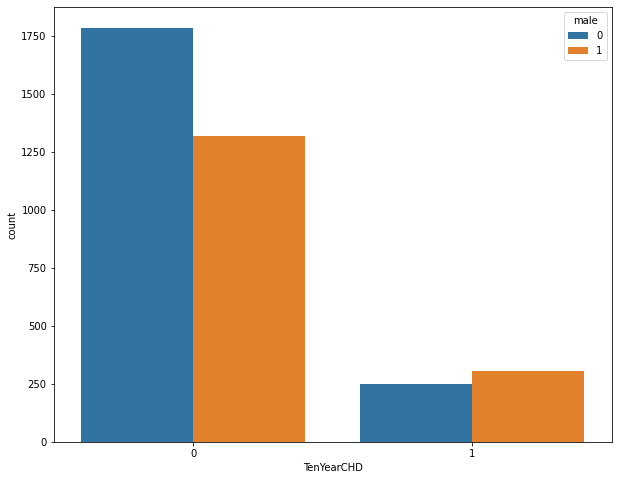

In [6]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.male)
plt.show()

In the sample of people who doesnt have CHD,females are dominant. Whereas in the sample of peple who has CHD, Males are dominant. Thus this variable is useful for prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


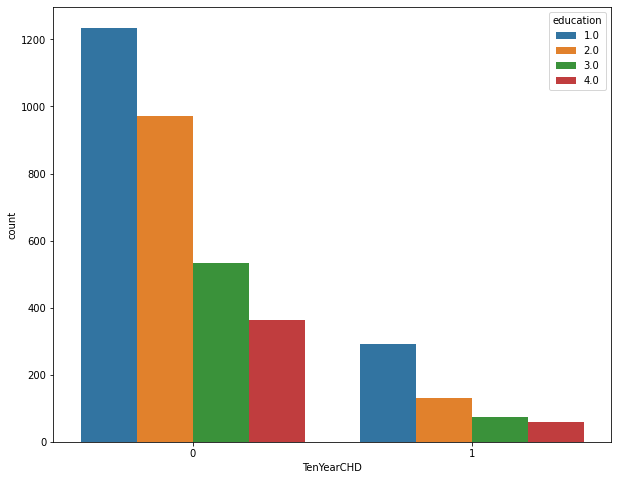

In [7]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.education)
plt.show()

for the people who has CHD and who doesnt, the distribution of edcuation remains the same. Thus this variable is not useful.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


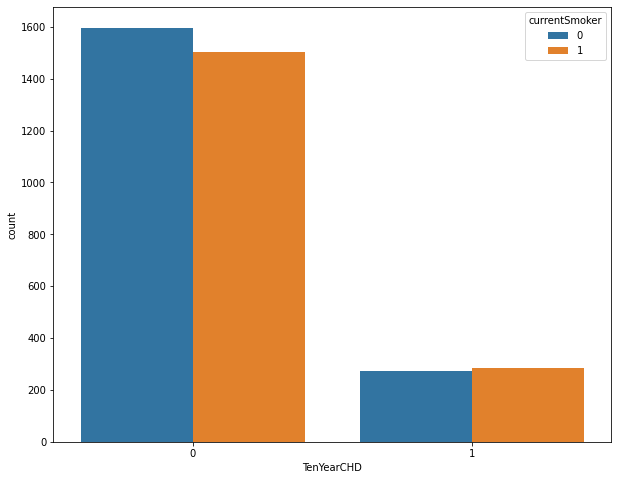

In [8]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.currentSmoker)
plt.show()

in the sample of people who doesnt have CHD,people who doesnt smoke are dominant. Whereas in the sample of peple who has CHD, people who smoke  are dominant. Thus this variable is useful for prediction. (But the diffence is very small.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


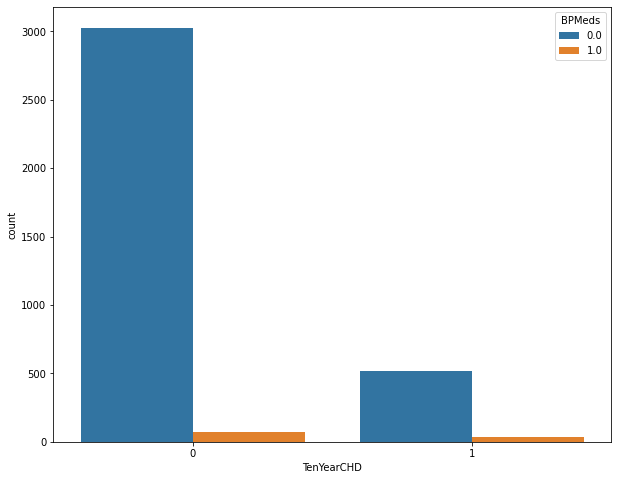

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.BPMeds)
plt.show()

for the people who has CHD and who doesnt, the distribution of BPMeds remains the same. Thus this variable is not useful.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


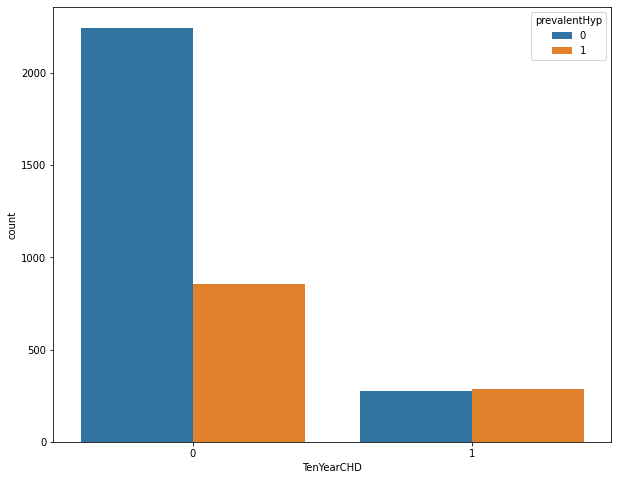

In [10]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.prevalentHyp)
plt.show()

in the sample of people who doesnt have CHD,people who didnt have hypertention are dominant. Whereas in the sample of peple who has CHD, people who had hypertention are dominant. Thus this variable is useful for prediction. (But the diffence is very small.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


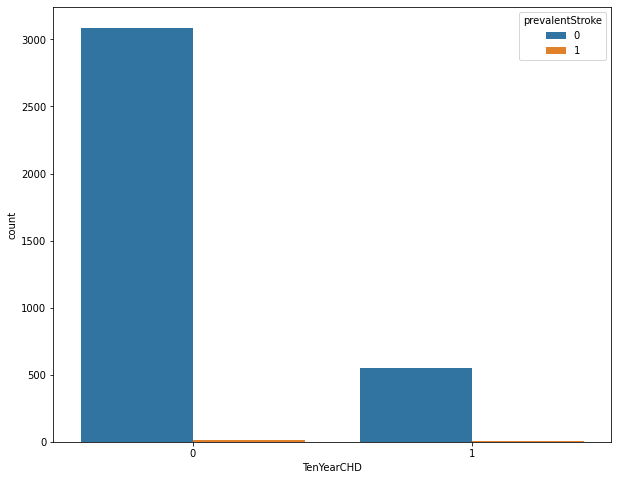

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(df.TenYearCHD, hue = df.prevalentStroke)
plt.show()

for the people who has CHD and who doesnt, the distribution of prevelantstroke remains the same. Thus this variable is not useful.

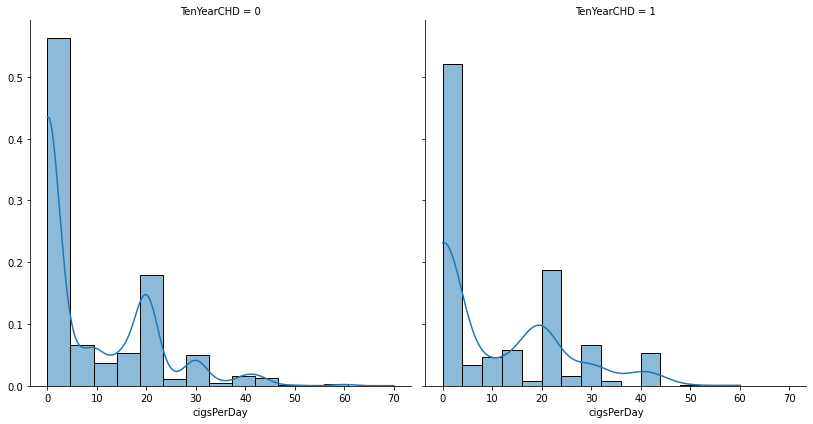

In [12]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "cigsPerDay",bins=15,stat='probability', kde=True)

same dist, no use

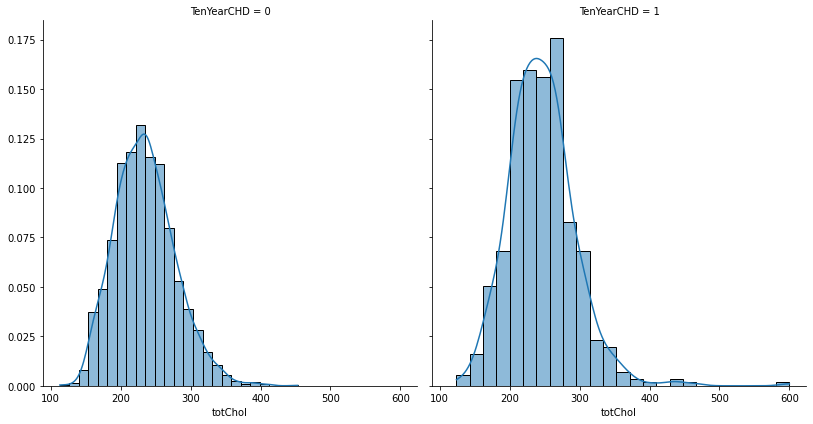

In [13]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "totChol",bins=25,stat='probability', kde=True)

same dist,no use

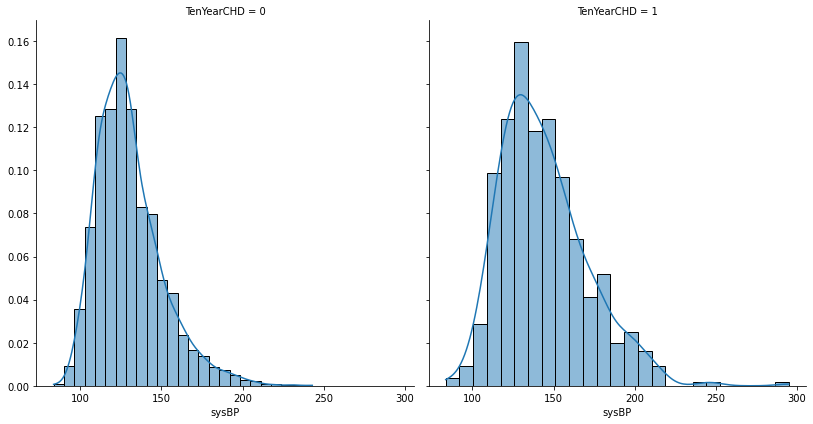

In [14]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "sysBP",bins=25,stat='probability', kde=True)

same dist, no use

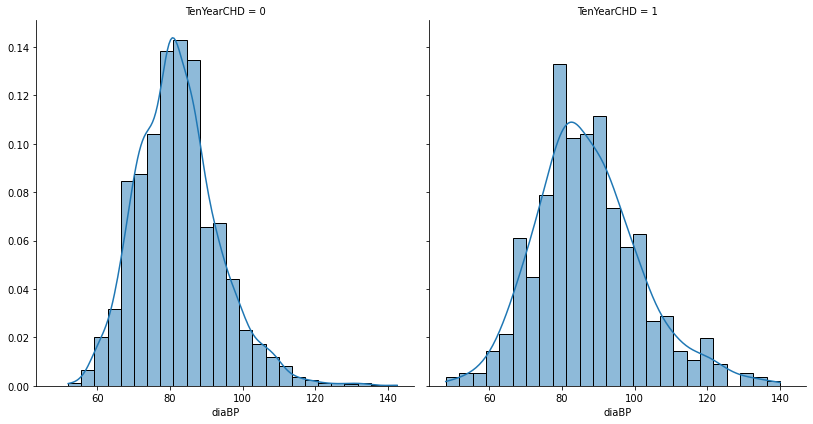

In [15]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "diaBP",bins=25,stat='probability', kde=True)

values after 100 have higher prob in people who has CHD, so variable useful.

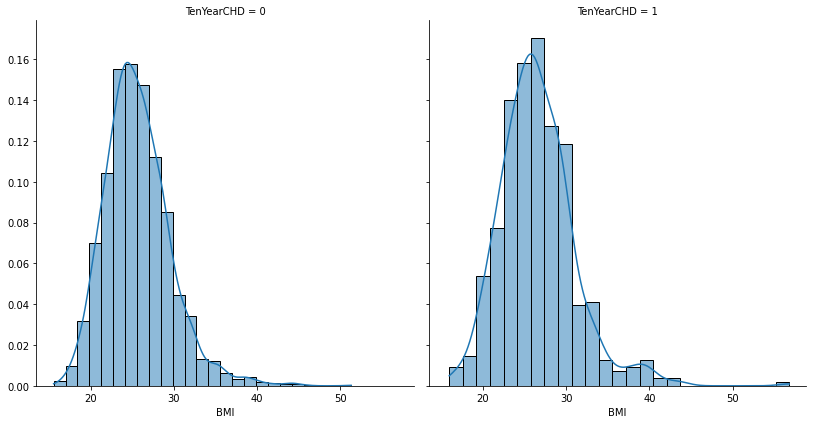

In [16]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "BMI",bins=25,stat='probability', kde=True)

same dist,no use

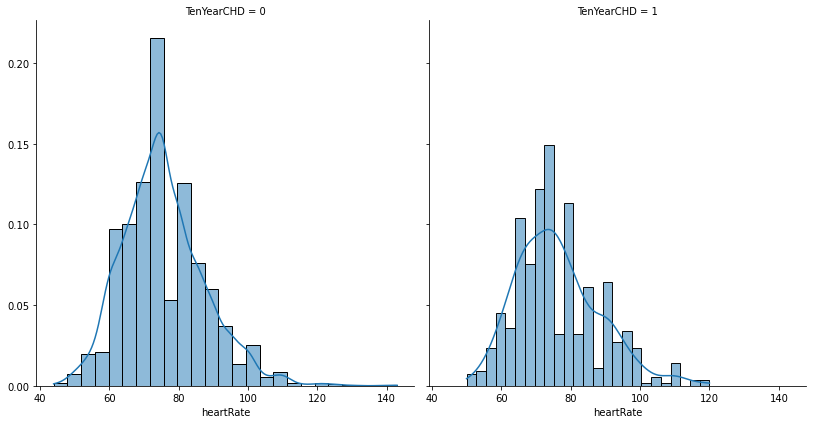

In [17]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "heartRate",bins=25,stat='probability', kde=True)

same dist,no use

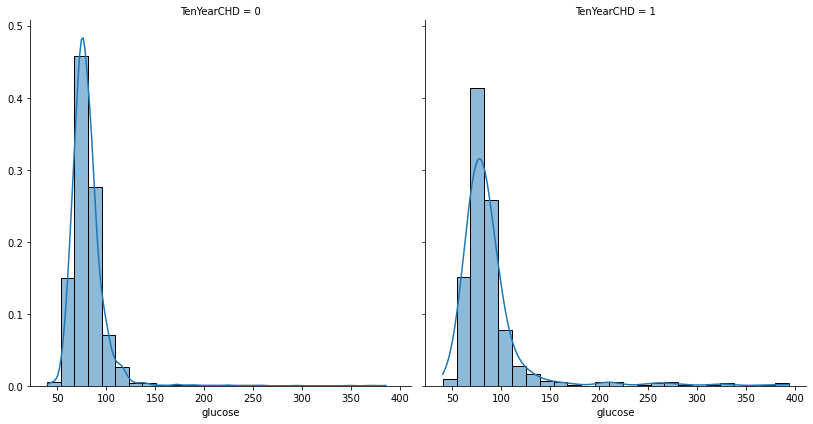

In [18]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "glucose",bins=25,stat='probability', kde=True)

same dist,no use

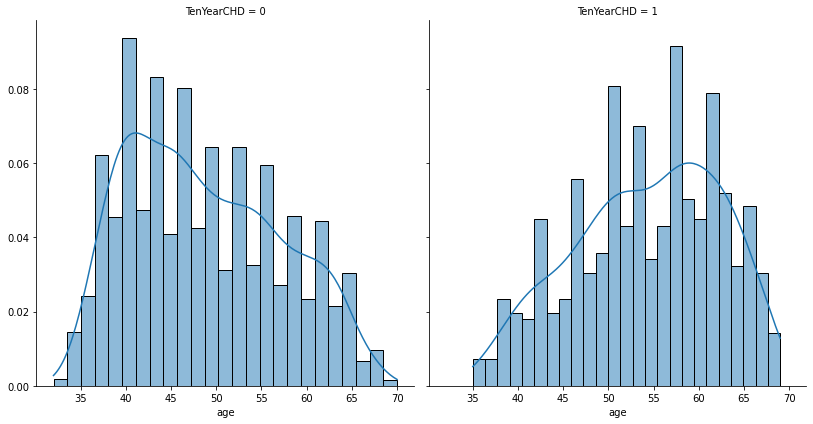

In [19]:
g = sns.FacetGrid(df, col="TenYearCHD",height=6,aspect=0.95)
g.map(sns.histplot, "age",bins=25,stat='probability', kde=True)

dist change, useful

# Data Spliting

In [20]:
y=df.iloc[:,15:16].values.ravel()
x=df.iloc[:,0:15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [21]:
import seaborn as sns

# Model 1- Unregularised

In [22]:
model1=LogisticRegression(penalty='none',solver="newton-cg")
model1.fit(x_train,y_train)
y_pred=model1.predict(x_train)

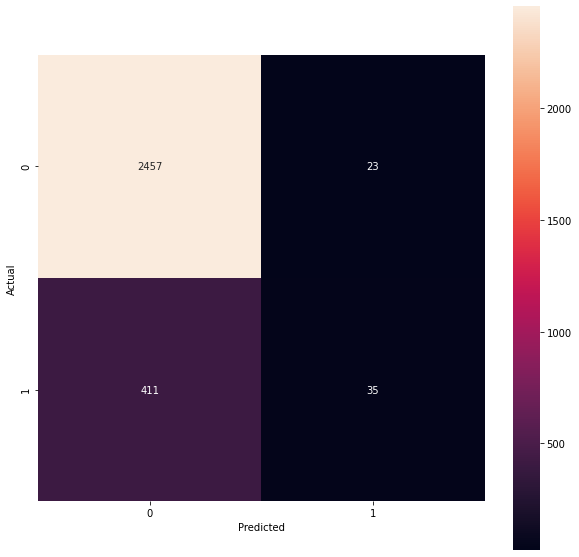

In [23]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [24]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2480
           1       0.60      0.08      0.14       446

    accuracy                           0.85      2926
   macro avg       0.73      0.53      0.53      2926
weighted avg       0.82      0.85      0.80      2926



In [25]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model1, x_train, y_train, cv=3,scoring='f1'))
print(np.round(np.mean(cross_val_score(model1, x_train, y_train, cv=3,scoring='f1')),3))
print(np.round(np.std(cross_val_score(model1, x_train, y_train, cv=3,scoring='f1')),3))

[0.10650888 0.14117647 0.13173653]
0.126
0.015


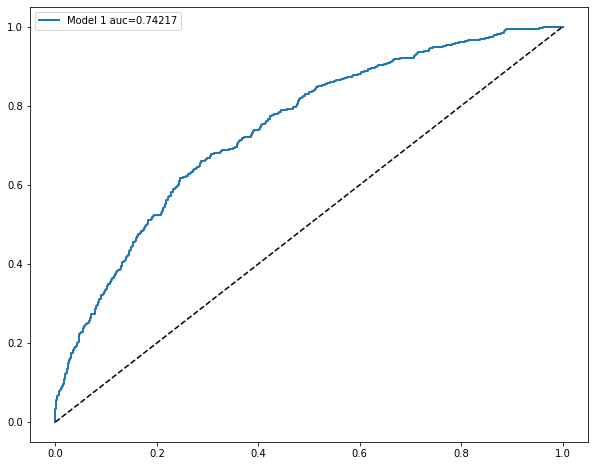

In [26]:
scores=model1.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 1"+" auc="+area)

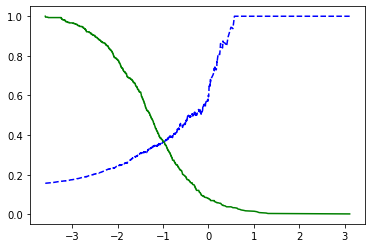

In [27]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [28]:
# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=-1.491418, F-Score=0.413


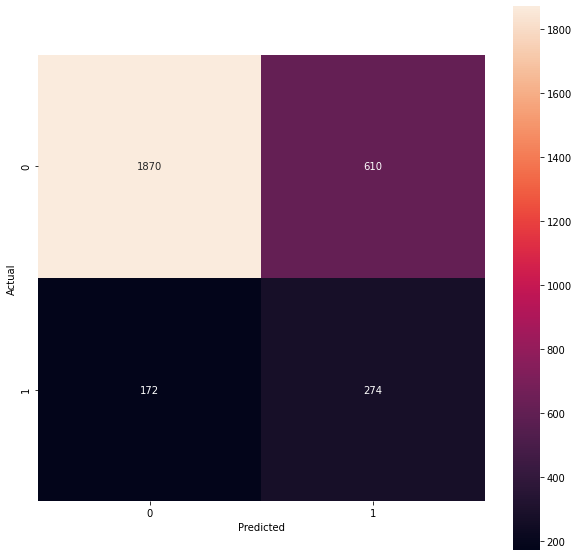

In [29]:
threshold = model1.decision_function(x_train)
y_pred_class=[]                #empty list to append created values

for value in threshold: 
    if value > thresholds[ix]:           
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred_class),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [30]:
print(metrics.classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2480
           1       0.31      0.61      0.41       446

    accuracy                           0.73      2926
   macro avg       0.61      0.68      0.62      2926
weighted avg       0.82      0.73      0.76      2926



In [31]:
print(df.TenYearCHD.value_counts())

0    3101
1     557
Name: TenYearCHD, dtype: int64


**As our class is imbalanced, we cannot use normal logistic regression.
Ways of handling class imbalance are:**


1.   Weighted Logistic Regression
2.   Undersampling the data
3.   Oversampling the data by SMOTE



# Model 2 -Unregularised,Weighted

In [32]:
model2=LogisticRegression(penalty='none',solver="newton-cg",class_weight="balanced")
model2.fit(x_train,y_train)
y_pred=model2.predict(x_train)

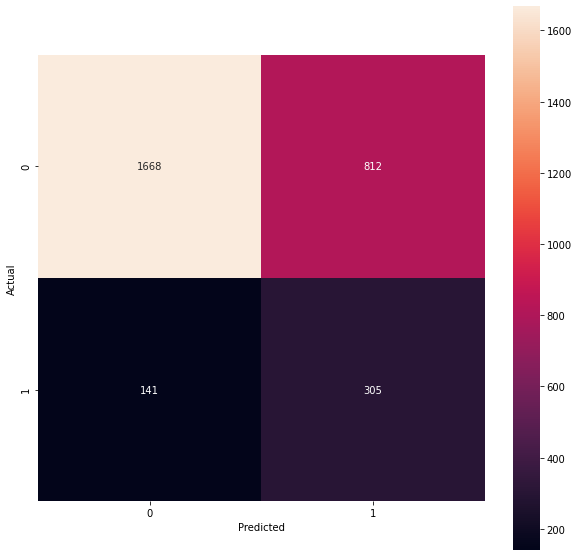

In [33]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [34]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2480
           1       0.27      0.68      0.39       446

    accuracy                           0.67      2926
   macro avg       0.60      0.68      0.58      2926
weighted avg       0.82      0.67      0.72      2926



In [35]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model2, x_train, y_train, cv=3,scoring='f1'))
print(np.round(np.mean(cross_val_score(model2, x_train, y_train, cv=3,scoring='f1')),3))
print(np.round(np.std(cross_val_score(model2, x_train, y_train, cv=3,scoring='f1')),3))

[0.38899804 0.3908046  0.38345865]
0.388
0.003


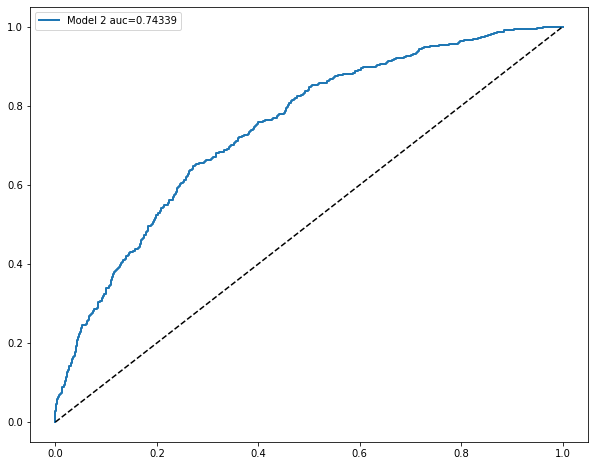

In [36]:
scores=model2.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

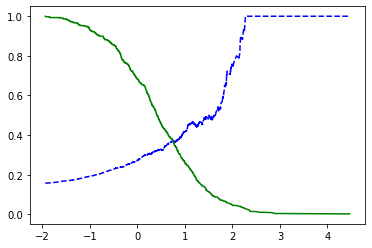

In [37]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [38]:
# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.159153, F-Score=0.411


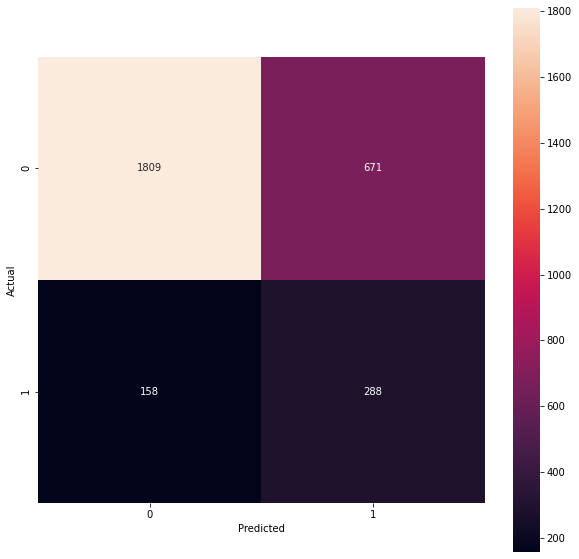

In [39]:
threshold = model2.decision_function(x_train)
y_pred_class=[]                #empty list to append created values

for value in threshold: 
    if value > thresholds[ix]:           
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred_class),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [40]:
print(metrics.classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      2480
           1       0.30      0.65      0.41       446

    accuracy                           0.72      2926
   macro avg       0.61      0.69      0.61      2926
weighted avg       0.83      0.72      0.75      2926



# Model 2.1 Grid searching weight for weighted logistic regression

In [41]:
model2_1=LogisticRegression(penalty='none',solver="newton-cg",max_iter=1000)

In [42]:
from sklearn.model_selection import GridSearchCV
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [43]:
w = [{0:1,1:1},{0:1,1:10},
     {0:1,1:20},{0:1,1:30},
     {0:1,1:40},{0:1,1:50},
     {0:1,1:60},{0:1,1:70},
     {0:1,1:80},{0:1,1:90},
     {0:1,1:100},{0:1,1:110}]

hyperparam_grid = {"class_weight": w }
grid = GridSearchCV(model2_1,hyperparam_grid,scoring="f1", cv=10, n_jobs=-1, refit=True,verbose=7)
grid.fit(x_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.0s finished


Best score: 0.3514455437740637 with param: {'class_weight': {0: 1, 1: 10}}


In [44]:
w = [{0:1,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4},{0:1,1:5},{0:1,1:6},{0:1,1:7},{0:1,1:8},{0:1,1:9},{0:1,1:10},{0:1,1:11},{0:1,1:12},{0:1,1:13},{0:1,1:14},{0:1,1:15},{0:1,1:16},{0:1,1:17},{0:1,1:18},{0:1,1:19},{0:1,1:20}]
hyperparam_grid = {"class_weight": w }
grid = GridSearchCV(model2_1,hyperparam_grid,scoring="f1", cv=10, n_jobs=-1, refit=True,verbose=7)
grid.fit(x_train,y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}, {0: 1, 1: 

In [45]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.39274317943650155 with param: {'class_weight': {0: 1, 1: 4}}


In [46]:
model2_1=LogisticRegression(penalty='none',solver="newton-cg",class_weight={0: 1, 1: 4})
model2_1.fit(x_train,y_train)
y_pred=model2_1.predict(x_train)

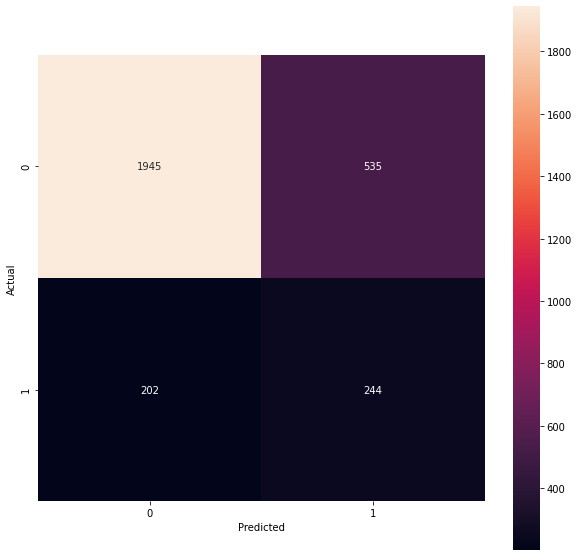

In [47]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [48]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2480
           1       0.31      0.55      0.40       446

    accuracy                           0.75      2926
   macro avg       0.61      0.67      0.62      2926
weighted avg       0.82      0.75      0.77      2926



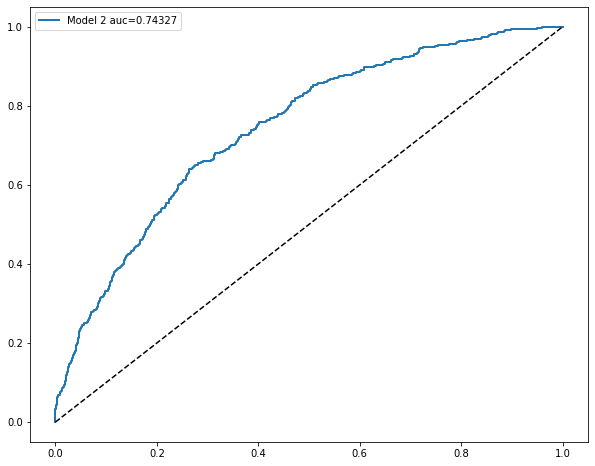

In [49]:
scores=model2_1.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plt.figure(figsize = (10,8))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

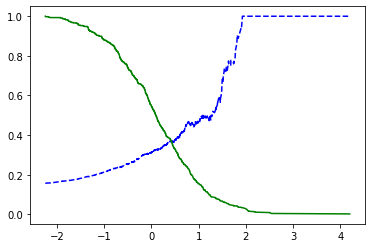

In [50]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [51]:
# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=-0.152369, F-Score=0.411


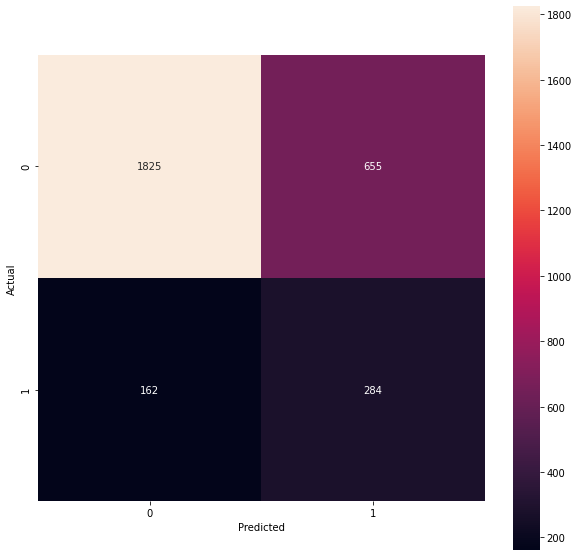

In [52]:
threshold = model2_1.decision_function(x_train)
y_pred_class=[]                #empty list to append created values

for value in threshold: 
    if value > thresholds[ix]:           
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred_class),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [53]:
print(metrics.classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2480
           1       0.30      0.64      0.41       446

    accuracy                           0.72      2926
   macro avg       0.61      0.69      0.61      2926
weighted avg       0.82      0.72      0.76      2926



# Model-3 With selected

In [54]:
y=df.iloc[:,15:16].values.ravel()
x=df[['male',"prevalentHyp","diaBP","age"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [55]:
model3=LogisticRegression(penalty='none',solver="newton-cg",class_weight="balanced")
model3.fit(x_train,y_train)
y_pred=model3.predict(x_train)

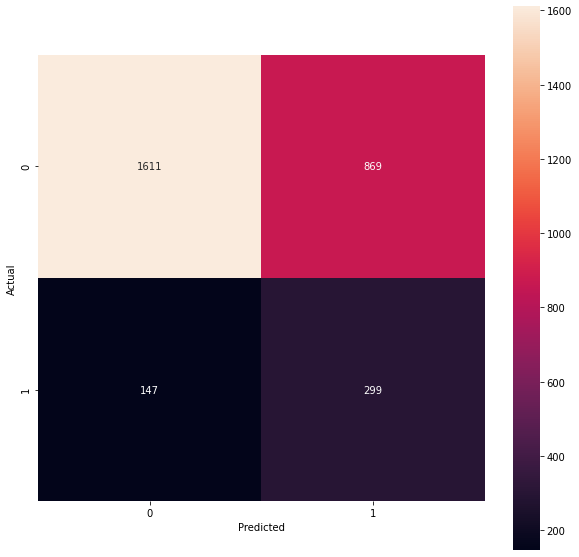

In [56]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [57]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      2480
           1       0.26      0.67      0.37       446

    accuracy                           0.65      2926
   macro avg       0.59      0.66      0.57      2926
weighted avg       0.82      0.65      0.70      2926



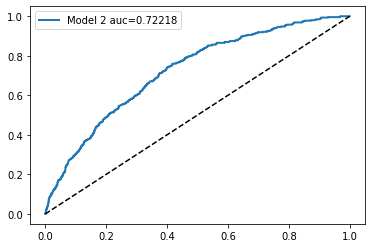

In [58]:
scores=model3.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

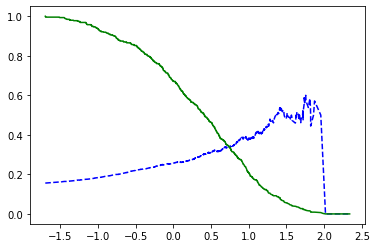

In [59]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [60]:
# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=2.017758, F-Score=nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


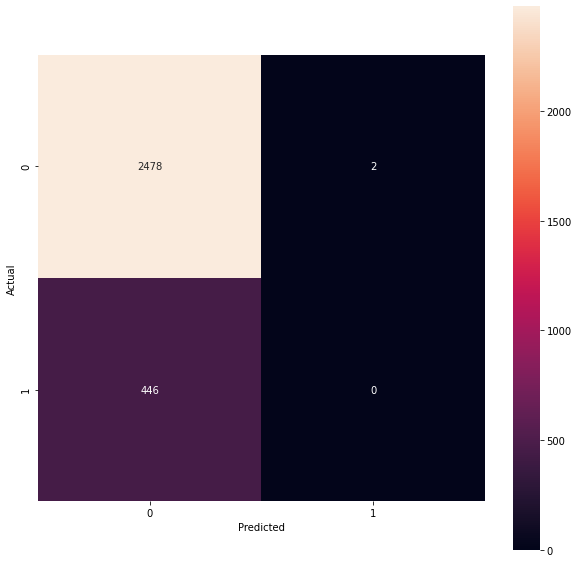

In [61]:
threshold = model3.decision_function(x_train)
y_pred_class=[]                #empty list to append created values

for value in threshold: 
    if value > thresholds[ix]:           
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred_class),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [62]:
print(metrics.classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2480
           1       0.00      0.00      0.00       446

    accuracy                           0.85      2926
   macro avg       0.42      0.50      0.46      2926
weighted avg       0.72      0.85      0.78      2926



# Model 4

In [63]:
y=df.iloc[:,15:16].values.ravel()
x=df.iloc[:,0:15]
x.shape

(3658, 15)

In [64]:
from sklearn.feature_selection import SelectFwe, chi2
a = SelectFwe(chi2, alpha=0.001)
xnew=a.fit_transform(x, y)
xnew.shape

(3658, 10)

In [65]:
xnew=x.iloc[:,a.get_support().tolist()]

In [66]:
xnew

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,77.0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,76.0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,70.0
3,0,61,30.0,0.0,1,0,225.0,150.0,95.0,103.0
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,1,0,313.0,179.0,92.0,86.0
4234,1,51,43.0,0.0,0,0,207.0,126.5,80.0,68.0
4237,0,52,0.0,0.0,0,0,269.0,133.5,83.0,107.0
4238,1,40,0.0,0.0,1,0,185.0,141.0,98.0,72.0


In [67]:
x_train, x_test, y_train, y_test = train_test_split(xnew, y, test_size=0.2, random_state=42,stratify=y)

In [68]:
model4=LogisticRegression(penalty='none',class_weight="balanced",solver='newton-cg')
model4.fit(x_train,y_train)
y_pred=model4.predict(x_train)

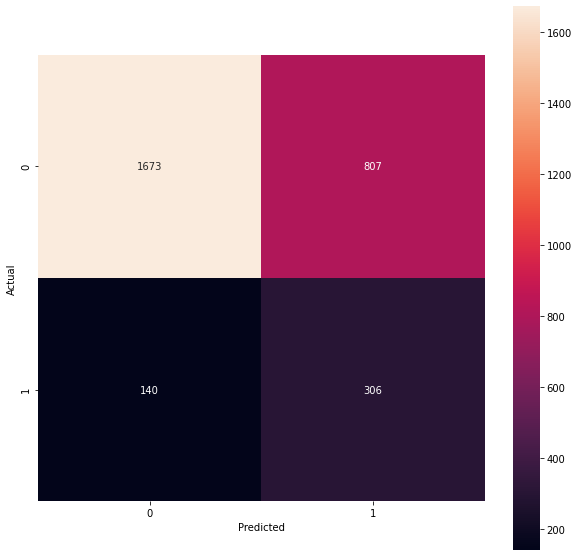

In [69]:
plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [70]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2480
           1       0.27      0.69      0.39       446

    accuracy                           0.68      2926
   macro avg       0.60      0.68      0.59      2926
weighted avg       0.82      0.68      0.72      2926



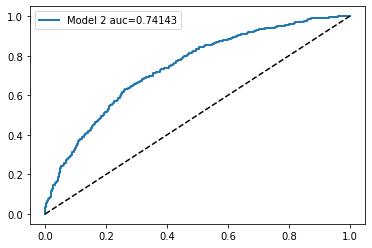

In [71]:
scores=model4.decision_function(x_train)
fpr, tpr, thresholds = roc_curve(y_train, scores)
area=str(np.round(auc(fpr,tpr),5))
plot_roc_curve(fpr,tpr,"Model 2"+" auc="+area)

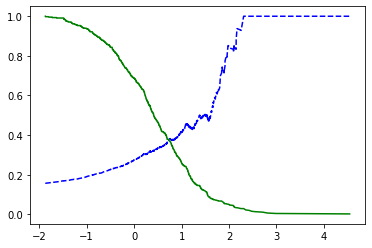

In [72]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [73]:
# convert to f score
fscore = (2 * precisions * recalls) / (precisions + recalls)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.201014, F-Score=0.409


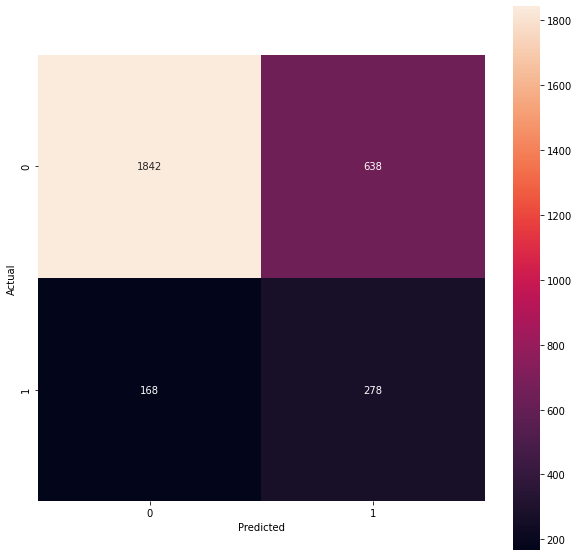

In [74]:
threshold = model4.decision_function(x_train)
y_pred_class=[]                #empty list to append created values

for value in threshold: 
    if value > thresholds[ix]:           
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

plt.figure(figsize=(10, 10))
a=sns.heatmap(confusion_matrix(y_train, y_pred_class),annot=True,fmt="d")
a.set(xlabel="Predicted", ylabel="Actual", aspect="equal");

In [75]:
print(metrics.classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2480
           1       0.30      0.62      0.41       446

    accuracy                           0.72      2926
   macro avg       0.61      0.68      0.61      2926
weighted avg       0.82      0.72      0.76      2926

